In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
df=pd.read_csv('CyberUAVIntrusion.csv')

In [4]:
df.shape

(42260, 58)

In [5]:
df['class'].dtype

dtype('O')

In [42]:
df['class'].value_counts()

class
Replay        12006
DoS attack    11671
benign         9425
evil_twin      5683
FDI            3473
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42260 entries, 0 to 42259
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   timestamp_c                       42258 non-null  float64
 1   frame.number                      42258 non-null  float64
 2   frame.len                         42258 non-null  float64
 3   wlan.ta                           42258 non-null  float64
 4   wlan.sa                           42258 non-null  float64
 5   wlan.ra                           42258 non-null  float64
 6   wlan.da                           42258 non-null  float64
 7   wlan.bssid                        42258 non-null  float64
 8   wlan.duration                     42258 non-null  float64
 9   wlan.frag                         42258 non-null  float64
 10  wlan.seq                          42258 non-null  float64
 11  wlan.fc.type                      42258 non-null  float64
 12  wlan

In [7]:
df.head()

,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,tcp.srcport,ip.len,tcp.ack_raw,udp.srcport,ip.ttl,tcp.dstport,udp.dstport,time_since_last_packet,ip.proto,tcp.seq_raw
0,1.683997e+09,3.0,293.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.683997e+09,12.0,295.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.683997e+09,18.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.683997e+09,30.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.683997e+09,42.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

timestamp_c                             2
frame.number                            2
frame.len                               2
wlan.ta                                 2
wlan.sa                                 2
wlan.ra                                 2
wlan.da                                 2
wlan.bssid                              2
wlan.duration                           2
wlan.frag                               2
wlan.seq                                2
wlan.fc.type                            2
wlan.fc.subtype                         2
wlan.flags                          33104
wlan.fcs                            33104
wlan.fcs.status                     33104
wlan.qos                            33104
wlan.qos.priority                   33104
wlan.qos.ack                        33104
wlan.ccmp.extiv                     33104
wlan.wep.key                        33104
data.len                                2
radiotap.hdr_length                 33104
radiotap.antenna_signal           

In [9]:
missing_percentage = df.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > 0.75].index.tolist()
df_cleaned = df.drop(columns=columns_to_drop)


In [10]:
columns_to_drop

['wlan.flags',
 'wlan.fcs',
 'wlan.fcs.status',
 'wlan.qos',
 'wlan.qos.priority',
 'wlan.qos.ack',
 'wlan.ccmp.extiv',
 'wlan.wep.key',
 'radiotap.hdr_length',
 'radiotap.antenna_signal',
 'radiotap.signal_quality',
 'radiotap.channel.flags.ofdm',
 'radiotap.channel.flags.cck',
 'wlan_radio.datarate',
 'wlan_radio.channel',
 'wlan_radio.frequency',
 'wlan_radio.signal_strength (dbm)',
 'wlan_radio.Noise level (dbm)',
 'wlan_radio.SNR (db)',
 'wlan_radio.preamble']

In [11]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['float64', 'int64']:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

C:\Users\Ananya Sinha\AppData\Local\Temp\ipykernel_10948\1395681967.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
C:\Users\Ananya Sinha\AppData\Local\Temp\ipykernel_10948\1395681967.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [12]:
df_cleaned.isnull().sum()

timestamp_c               0
frame.number              0
frame.len                 0
wlan.ta                   0
wlan.sa                   0
wlan.ra                   0
wlan.da                   0
wlan.bssid                0
wlan.duration             0
wlan.frag                 0
wlan.seq                  0
wlan.fc.type              0
wlan.fc.subtype           0
data.len                  0
class                     0
tcp.hdr_len               0
llc.type                  0
data.data                 0
tcp.window_size           0
udp.length                0
tcp.options               0
ip.hdr_len                0
ip.src                    0
ip.id                     0
frame.protocols           0
ip.flags                  0
tcp.flags                 0
ip.dst                    0
tcp.srcport               0
ip.len                    0
tcp.ack_raw               0
udp.srcport               0
ip.ttl                    0
tcp.dstport               0
udp.dstport               0
time_since_last_pack

In [13]:
df_cleaned.head()

,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,tcp.srcport,ip.len,tcp.ack_raw,udp.srcport,ip.ttl,tcp.dstport,udp.dstport,time_since_last_packet,ip.proto,tcp.seq_raw
0,1.683997e+09,3.0,293.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0
1,1.683997e+09,12.0,295.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0
2,1.683997e+09,18.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0
3,1.683997e+09,30.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0
4,1.683997e+09,42.0,294.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0


In [14]:
X=df_cleaned.drop('class',axis=1)
y=df_cleaned['class']

In [15]:
X.head(1)

,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,tcp.srcport,ip.len,tcp.ack_raw,udp.srcport,ip.ttl,tcp.dstport,udp.dstport,time_since_last_packet,ip.proto,tcp.seq_raw
0,1.683997e+09,3.0,293.0,0.0,1.0,1.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003374,0.0,0.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42260 entries, 0 to 42259
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp_c             42260 non-null  float64
 1   frame.number            42260 non-null  float64
 2   frame.len               42260 non-null  float64
 3   wlan.ta                 42260 non-null  float64
 4   wlan.sa                 42260 non-null  float64
 5   wlan.ra                 42260 non-null  float64
 6   wlan.da                 42260 non-null  float64
 7   wlan.bssid              42260 non-null  float64
 8   wlan.duration           42260 non-null  float64
 9   wlan.frag               42260 non-null  float64
 10  wlan.seq                42260 non-null  float64
 11  wlan.fc.type            42260 non-null  float64
 12  wlan.fc.subtype         42260 non-null  float64
 13  data.len                42260 non-null  float64
 14  tcp.hdr_len             42260 non-null

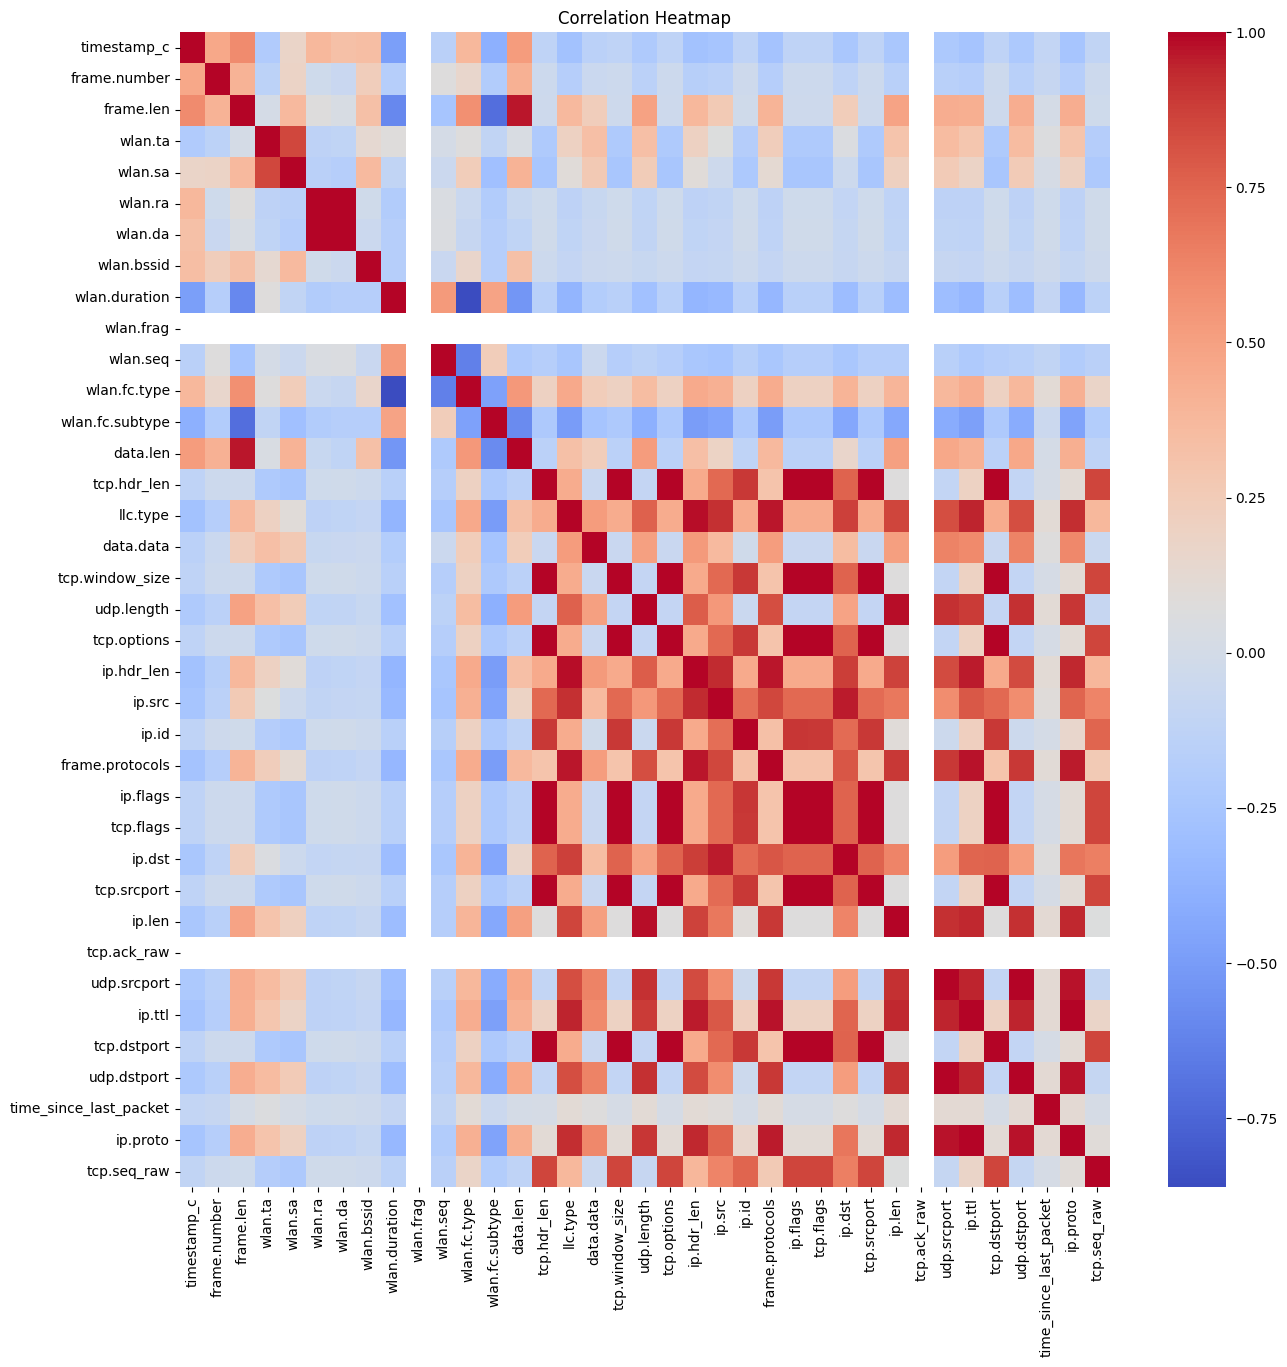

In [17]:
plt.figure(figsize=(15, 15)) 
sns.heatmap(X.corr(), fmt=".2f", cmap="coolwarm") 
plt.title("Correlation Heatmap")
plt.show()

In [18]:
X.shape

(42260, 37)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler=StandardScaler()
le=LabelEncoder()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

In [25]:
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

models = {
    'RandomForest Classifier': RandomForestClassifier(),
    'GradientBoost Classifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train_bin, y_train_proba, average='weighted', multi_class='ovr')

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')

    print(list(models.keys())[i])
    print('Model performance for training set')
    print('- Accuracy:{:.4f}'.format(model_train_accuracy))
    print('- F1 score:{:.4f}'.format(model_train_f1))
    print('- Recall:{:.4f}'.format(model_train_recall))
    print('- Precision:{:.4f}'.format(model_train_precision))
    print('- Roc Auc Score:{:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------------------------------------------------')

    print('Model performance for test set')
    print('- Accuracy:{:.4f}'.format(model_test_accuracy))
    print('- F1 score:{:.4f}'.format(model_test_f1))
    print('- Recall:{:.4f}'.format(model_test_recall))
    print('- Precision:{:.4f}'.format(model_test_precision))
    print('- Roc Auc Score:{:.4f}'.format(model_test_rocauc_score))

    print('=' * 70)
    print('\n')


RandomForest Classifier
Model performance for training set
- Accuracy:0.9975
- F1 score:0.9975
- Recall:0.9975
- Precision:0.9975
- Roc Auc Score:1.0000
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.9942
- F1 score:0.9942
- Recall:0.9942
- Precision:0.9942
- Roc Auc Score:0.9999


GradientBoost Classifier
Model performance for training set
- Accuracy:0.9971
- F1 score:0.9971
- Recall:0.9971
- Precision:0.9971
- Roc Auc Score:1.0000
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.9962
- F1 score:0.9962
- Recall:0.9962
- Precision:0.9962
- Roc Auc Score:1.0000


AdaBoostClassifier
Model performance for training set
- Accuracy:0.4986
- F1 score:0.3654
- Recall:0.4986
- Precision:0.3173
- Roc Auc Score:0.9430
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.5098
- F1 

  File "C:\Users\Ananya Sinha\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KNeighborsClassifier
Model performance for training set
- Accuracy:0.9537
- F1 score:0.9537
- Recall:0.9537
- Precision:0.9539
- Roc Auc Score:0.9970
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.9321
- F1 score:0.9320
- Recall:0.9321
- Precision:0.9323
- Roc Auc Score:0.9874




In [26]:
knn_params={
    'n_neighbors':[1,2,3,4,5,6,7,8,9],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']

}

adaboost_param={
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R']
}



In [27]:
randomcv_models=[
    ('KNN',KNeighborsClassifier(),knn_params),
    ('AB',AdaBoostClassifier(),adaboost_param)
]

In [28]:
randomcv_models

[('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan', 'minkowski']}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [29]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                                  param_distributions=params,
                                  n_iter=100,
                                  cv=3,
                                  verbose=2,
                                  n_jobs=-1
                                  )
    
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f'-------------------------Best Params for {model_name}------------------------------------------')
    print(model_param[model_name])

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
-------------------------Best Params for KNN------------------------------------------
{'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan'}
-------------------------Best Params for AB------------------------------------------
{'n_estimators': 50, 'algorithm': 'SAMME'}


In [30]:
models={
    'KNearestNeighbors ': KNeighborsClassifier(weights='distance',n_neighbors=4,metric='manhattan'),
    'AdaBoost':AdaBoostClassifier(n_estimators=50, algorithm='SAMME'),
    'RandomForest Classifier': RandomForestClassifier(),
    'GradientBoost Classifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train_bin, y_train_proba, average='weighted', multi_class='ovr')

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')

    print(list(models.keys())[i])
    print('Model performance for training set')
    print('- Accuracy:{:.4f}'.format(model_train_accuracy))
    print('- F1 score:{:.4f}'.format(model_train_f1))
    print('- Recall:{:.4f}'.format(model_train_recall))
    print('- Precision:{:.4f}'.format(model_train_precision))
    print('- Roc Auc Score:{:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------------------------------------------------')

    print('Model performance for test set')
    print('- Accuracy:{:.4f}'.format(model_test_accuracy))
    print('- F1 score:{:.4f}'.format(model_test_f1))
    print('- Recall:{:.4f}'.format(model_test_recall))
    print('- Precision:{:.4f}'.format(model_test_precision))
    print('- Roc Auc Score:{:.4f}'.format(model_test_rocauc_score))

    print('=' * 70)
    print('\n')

KNearestNeighbors 
Model performance for training set
- Accuracy:0.9975
- F1 score:0.9975
- Recall:0.9975
- Precision:0.9976
- Roc Auc Score:1.0000
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.9455
- F1 score:0.9454
- Recall:0.9455
- Precision:0.9455
- Roc Auc Score:0.9853


AdaBoost
Model performance for training set
- Accuracy:0.4986
- F1 score:0.3654
- Recall:0.4986
- Precision:0.3173
- Roc Auc Score:0.9430
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.5098
- F1 score:0.3780
- Recall:0.5098
- Precision:0.3296
- Roc Auc Score:0.9465


RandomForest Classifier
Model performance for training set
- Accuracy:0.9975
- F1 score:0.9975
- Recall:0.9975
- Precision:0.9975
- Roc Auc Score:1.0000
------------------------------------------------------------------------------
Model performance for test set
- Accuracy:0.9943
- F1 score:0.9943
- R

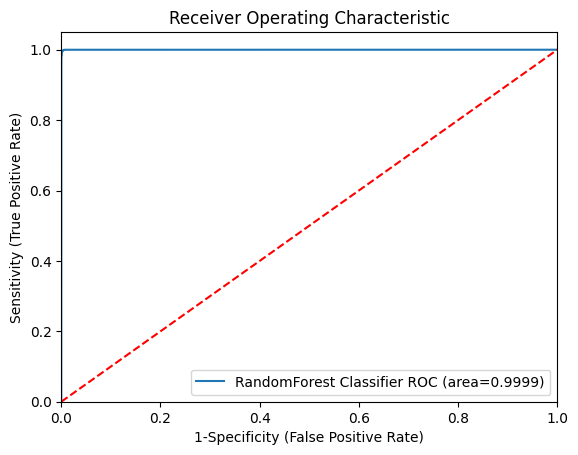

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

plt.figure()

auc_models = [
    {
        'label': 'RandomForest Classifier',
        'model': RandomForestClassifier(),
        'auc': 0.9999
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    plt.plot(fpr, tpr, label='%s ROC (area=%0.4f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("aucRF.png")
plt.show()


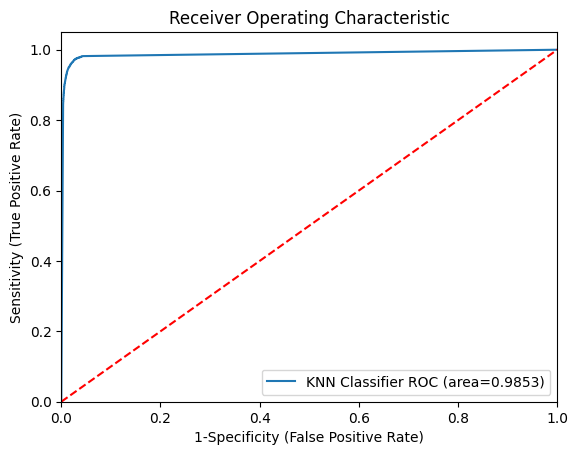

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

plt.figure()

auc_models = [
    {
        'label': 'KNN Classifier',
        'model': KNeighborsClassifier(weights='distance',n_neighbors=4,metric='manhattan'),
        'auc': 0.9853
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    plt.plot(fpr, tpr, label='%s ROC (area=%0.4f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("aucknn.png")
plt.show()


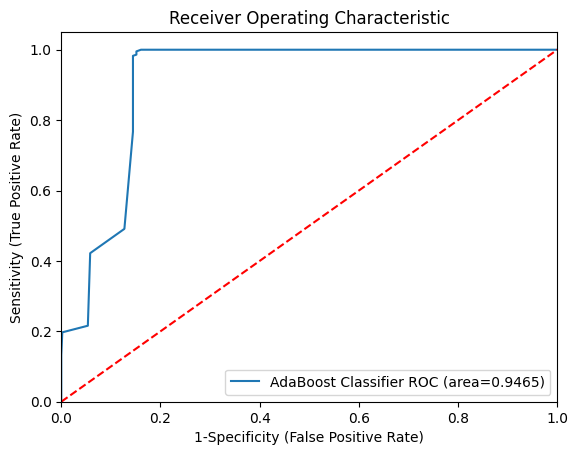

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

plt.figure()

auc_models = [
    {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(n_estimators=50, algorithm='SAMME'),
        'auc': 0.9465  
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    plt.plot(fpr, tpr, label='%s ROC (area=%0.4f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("aucADB.png")
plt.show()


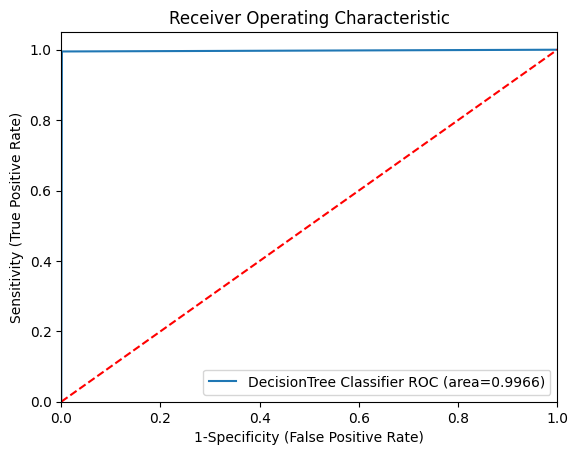

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

plt.figure()

auc_models = [
    {
        'label': 'DecisionTree Classifier',
        'model': DecisionTreeClassifier(),
        'auc': 0.9966 
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    plt.plot(fpr, tpr, label='%s ROC (area=%0.4f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("aucDT.png")
plt.show()


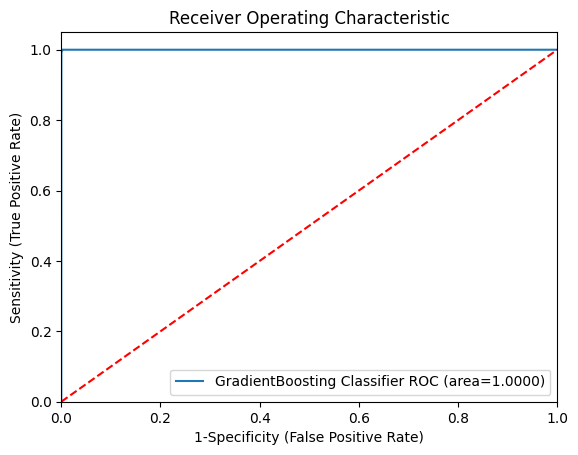

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

plt.figure()

auc_models = [
    {
        'label': 'GradientBoosting Classifier',
        'model': GradientBoostingClassifier(),
        'auc': 1.0000
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    plt.plot(fpr, tpr, label='%s ROC (area=%0.4f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("aucGB.png")
plt.show()


In [36]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)


GradientBoostingClassifier()

In [37]:
y_pred=gb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2331
           1       1.00      1.00      1.00       728
           2       0.99      0.99      0.99      2409
           3       1.00      1.00      1.00      1812
           4       1.00      1.00      1.00      1172

    accuracy                           1.00      8452
   macro avg       1.00      1.00      1.00      8452
weighted avg       1.00      1.00      1.00      8452



In [39]:
def predict_from_input(user_input_dict, model, scaler):
    """
    user_input_dict: Dictionary of input features (same keys as training features)
    model: Trained model
    scaler: StandardScaler fitted on training data
    """
    import numpy as np
    import pandas as pd
    user_df = pd.DataFrame([user_input_dict])
    user_scaled = scaler.transform(user_df)
    pred = model.predict(user_scaled)[0]
    pred_proba = model.predict_proba(user_scaled)

    return pred, pred_proba


In [40]:

#Example
user_input = {
    'timestamp_c': 1714382765.0,
    'frame.number': 1000.0,
    'frame.len': 128.0,
    'wlan.ta': 1.0,
    'wlan.sa': 1.0,
    'wlan.ra': 1.0,
    'wlan.da': 1.0,
    'wlan.bssid': 1.0,
    'wlan.duration': 10.0,
    'wlan.frag': 0.0,
    'wlan.seq': 32.0,
    'wlan.fc.type': 2.0,
    'wlan.fc.subtype': 8.0,
    'data.len': 64.0,
    'tcp.hdr_len': 20.0,
    'llc.type': 2048.0,
    'data.data': 256.0,
    'tcp.window_size': 8192.0,
    'udp.length': 60.0,
    'tcp.options': 1.0,
    'ip.hdr_len': 5.0,
    'ip.src': 1.0,
    'ip.id': 54321.0,
    'frame.protocols': 1.0,
    'ip.flags': 2.0,
    'tcp.flags': 24.0,
    'ip.dst': 1.0,
    'tcp.srcport': 443.0,
    'ip.len': 1500.0,
    'tcp.ack_raw': 1.0,
    'udp.srcport': 53.0,
    'ip.ttl': 64.0,
    'tcp.dstport': 5060.0,
    'udp.dstport': 123.0,
    'time_since_last_packet': 0.004,
    'ip.proto': 6.0,
    'tcp.seq_raw': 123456789.0
}


In [41]:
prediction, proba = predict_from_input(user_input, models['GradientBoost Classifier'], scaler)
print("Predicted class:", le.inverse_transform([prediction])[0])


Predicted class: FDI


In [45]:
import pickle
import pickle
with open('bestmodel.pkl', 'wb') as f:
    pickle.dump(gb, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('Label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

